In [1]:
#Importing Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter

In [2]:
#Loading dataset
df = pd.read_csv('dataset/telecom-dataset.csv')
df.head()

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [3]:
# Number of rows and attributes in the dataset
print(df.shape)

(3333, 21)


In [4]:
# Name of the attributes
print(df.columns)

Index(['state', 'account length', 'area code', 'phone number',
       'international plan', 'voice mail plan', 'number vmail messages',
       'total day minutes', 'total day calls', 'total day charge',
       'total eve minutes', 'total eve calls', 'total eve charge',
       'total night minutes', 'total night calls', 'total night charge',
       'total intl minutes', 'total intl calls', 'total intl charge',
       'customer service calls', 'churn'],
      dtype='object')


In [5]:
#Data type of columns in the dataset
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
state                     3333 non-null object
account length            3333 non-null int64
area code                 3333 non-null int64
phone number              3333 non-null object
international plan        3333 non-null object
voice mail plan           3333 non-null object
number vmail messages     3333 non-null int64
total day minutes         3333 non-null float64
total day calls           3333 non-null int64
total day charge          3333 non-null float64
total eve minutes         3333 non-null float64
total eve calls           3333 non-null int64
total eve charge          3333 non-null float64
total night minutes       3333 non-null float64
total night calls         3333 non-null int64
total night charge        3333 non-null float64
total intl minutes        3333 non-null float64
total intl calls          3333 non-null int64
total intl charge         3333 non-null float64

In [6]:
#Checking for missing values
df.isnull().sum()

state                     0
account length            0
area code                 0
phone number              0
international plan        0
voice mail plan           0
number vmail messages     0
total day minutes         0
total day calls           0
total day charge          0
total eve minutes         0
total eve calls           0
total eve charge          0
total night minutes       0
total night calls         0
total night charge        0
total intl minutes        0
total intl calls          0
total intl charge         0
customer service calls    0
churn                     0
dtype: int64

Clearly there are no missing values present in the dataset. So we can proceed with Univariate analysis. 
For that we must first classify our attributes into two groups

1. Quantitative - Continious and Discrete Values

2. Categorical and boolean.

In order to do that

1. Find the frequency table of each attribute.

2. Plot the attributes and understand the distribution.

Now we have to understand which of the attributes is Quantitative and which is categorical or boolean.

Part 1: Finding out quantitative attributes

01. account length            3333 non-null int64
02. number vmail messages     3333 non-null int64
03. total day minutes         3333 non-null float64
04. total day calls           3333 non-null int64
05. total day charge          3333 non-null float64
06. total eve minutes         3333 non-null float64
07. total eve calls           3333 non-null int64
08. total eve charge          3333 non-null float64
09. total night minutes       3333 non-null float64
10. total night calls         3333 non-null int64
11. total night charge        3333 non-null float64
12. total intl minutes        3333 non-null float64
13. total intl charge         3333 non-null float64

Part 2:Find out categorical or boolean attributes

1. state                     3333 non-null object
2. area code                 3333 non-null int64
3. phone number              3333 non-null object
4. international plan        3333 non-null object
5. voice mail plan           3333 non-null object
6. churn                     3333 non-null bool
7. customer service calls    3333 non-null int64
8. total intl calls          3333 non-null int64

Univariate Analysis

For quantitative variable we have to:

a. Find out the descriptive statistics for each attributes.

b. Plot Histogram, Kernel Density Plot(KDE) and Boxplot.

For categorical variable we have to:

a. Find out the frequency table for each attributes.

b. Plot Barchart.

In [7]:
# Descriptive Statistics of Quantitative attributes
df.describe(include = ['float64', 'int64'])

,account length,area code,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,101.064806,437.182418,8.099010,179.775098,100.435644,30.562307,200.980348,100.114311,17.083540,200.872037,100.107711,9.039325,10.237294,4.479448,2.764581,1.562856
std,39.822106,42.371290,13.688365,54.467389,20.069084,9.259435,50.713844,19.922625,4.310668,50.573847,19.568609,2.275873,2.791840,2.461214,0.753773,1.315491
min,1.000000,408.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.200000,33.000000,1.040000,0.000000,0.000000,0.000000,0.000000
25%,74.000000,408.000000,0.000000,143.700000,87.000000,24.430000,166.600000,87.000000,14.160000,167.000000,87.000000,7.520000,8.500000,3.000000,2.300000,1.000000
50%,101.000000,415.000000,0.000000,179.400000,101.000000,30.500000,201.400000,100.000000,17.120000,201.200000,100.000000,9.050000,10.300000,4.000000,2.780000,1.000000
75%,127.000000,510.000000,20.000000,216.400000,114.000000,36.790000,235.300000,114.000000,20.000000,235.300000,113.000000,10.590000,12.100000,6.000000,3.270000,2.000000
max,243.000000,510.000000,51.000000,350.800000,165.000000,59.640000,363.700000,170.000000,30.910000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000


In [8]:
# Descriptive statistics for categorical and boolean attributes
df.describe(include = ['object', 'bool'])

,state,phone number,international plan,voice mail plan,churn
count,3333,3333,3333,3333,3333
unique,51,3333,2,2,2
top,WV,391-4358,no,no,False
freq,106,1,3010,2411,2850


In [9]:
# Frequency table for categorical and boolean attributes
df['state'].value_counts()

WV    106
MN     84
NY     83
AL     80
WI     78
OH     78
OR     78
WY     77
VA     77
CT     74
MI     73
ID     73
VT     73
TX     72
UT     72
IN     71
MD     70
KS     70
MT     68
NJ     68
NC     68
NV     66
CO     66
WA     66
MS     65
MA     65
RI     65
AZ     64
FL     63
MO     63
ND     62
NM     62
ME     62
OK     61
DE     61
NE     61
SD     60
SC     60
KY     59
IL     58
NH     56
AR     55
GA     54
DC     54
TN     53
HI     53
AK     52
LA     51
PA     45
IA     44
CA     34
Name: state, dtype: int64

In [10]:
df['international plan'].value_counts()

no     3010
yes     323
Name: international plan, dtype: int64

In [11]:
df['area code'].value_counts()

415    1655
510     840
408     838
Name: area code, dtype: int64

In [12]:
df['voice mail plan'].value_counts()

no     2411
yes     922
Name: voice mail plan, dtype: int64

In [13]:
df['churn'].value_counts()

False    2850
True      483
Name: churn, dtype: int64

In [14]:
df['customer service calls'].value_counts()

1    1181
2     759
0     697
3     429
4     166
5      66
6      22
7       9
9       2
8       2
Name: customer service calls, dtype: int64

In [15]:
df['total intl calls'].value_counts()

3     668
4     619
2     489
5     472
6     336
7     218
1     160
8     116
9     109
10     50
11     28
0      18
12     15
13     14
15      7
14      6
18      3
16      2
19      1
17      1
20      1
Name: total intl calls, dtype: int64

Histograms for quantitative variables
1. account length
2. number vmail messages
3. total day minutes
4. total day calls
5. total day charge
6. total eve minutes
7. total eve calls
8. total eve charge
9. total night minutes
10. total night calls
11. total night charge
12. total intl minutes
13. total intl charge

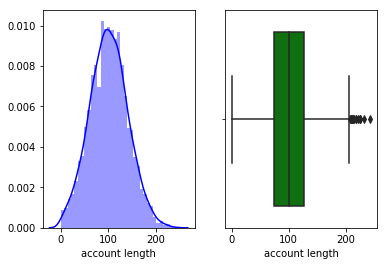

In [16]:
plt.subplot(121)
sns.distplot(df['account length'], color = 'blue')
plt.subplot(122)
sns.boxplot(df['account length'], color = 'green')
plt.show()

In [17]:
plt.close()

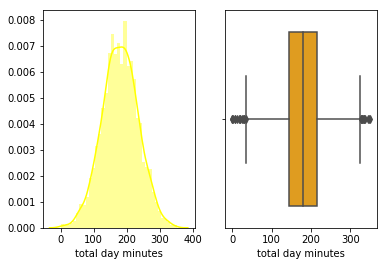

In [18]:
plt.subplot(121)
sns.distplot(df['total day minutes'], color = 'yellow')
plt.subplot(122)
sns.boxplot(df['total day minutes'], color = 'orange')
plt.show()

In [19]:
plt.close()

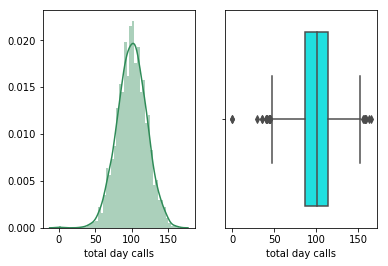

In [20]:
plt.subplot(121)
sns.distplot(df['total day calls'], color = 'seagreen')
plt.subplot(122)
sns.boxplot(df['total day calls'], color = 'cyan')
plt.show()

In [21]:
plt.close()

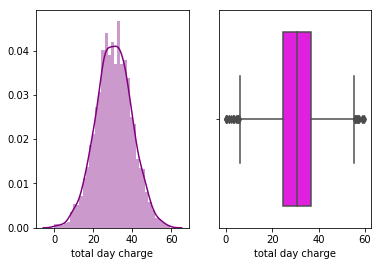

In [22]:
plt.subplot(121)
sns.distplot(df['total day charge'], color = 'purple')
plt.subplot(122)
sns.boxplot(df['total day charge'], color = 'magenta')
plt.show()

In [23]:
plt.close()

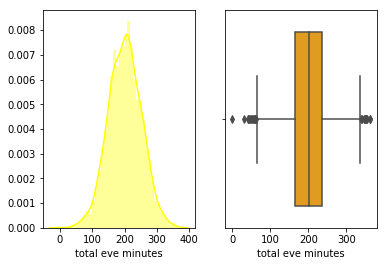

In [24]:
plt.subplot(121)
sns.distplot(df['total eve minutes'], color = 'yellow')
plt.subplot(122)
sns.boxplot(df['total eve minutes'], color = 'orange')
plt.show()

In [25]:
plt.close()

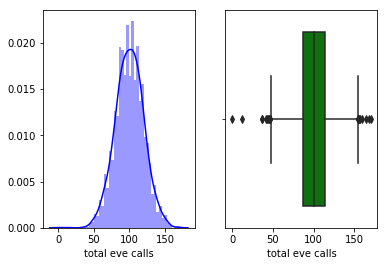

In [26]:
plt.subplot(121)
sns.distplot(df['total eve calls'], color = 'blue')
plt.subplot(122)
sns.boxplot(df['total eve calls'], color = 'green')
plt.show()

In [27]:
plt.close()

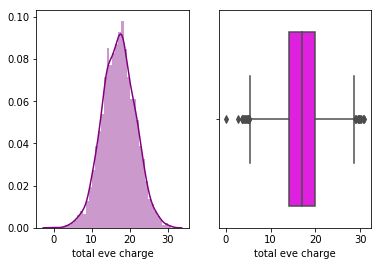

In [28]:
plt.subplot(121)
sns.distplot(df['total eve charge'], color = 'purple')
plt.subplot(122)
sns.boxplot(df['total eve charge'], color = 'magenta')
plt.show()

In [29]:
plt.close()

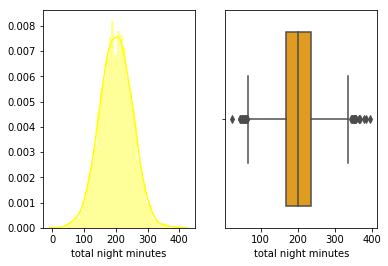

In [30]:
plt.subplot(121)
sns.distplot(df['total night minutes'], color = 'yellow')
plt.subplot(122)
sns.boxplot(df['total night minutes'], color = 'orange')
plt.show()

In [31]:
plt.close()

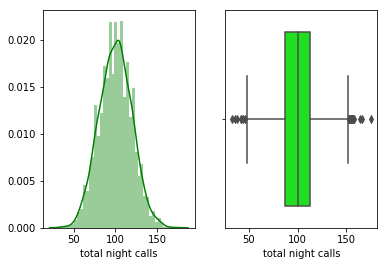

In [32]:
plt.subplot(121)
sns.distplot(df['total night calls'], color = 'green')
plt.subplot(122)
sns.boxplot(df['total night calls'], color = 'lime')
plt.show()

In [33]:
plt.close()

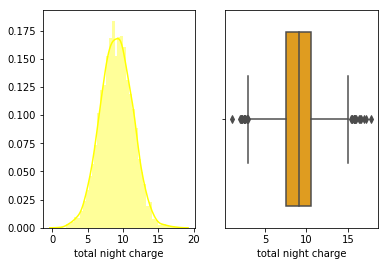

In [34]:
plt.subplot(121)
sns.distplot(df['total night charge'], color = 'yellow')
plt.subplot(122)
sns.boxplot(df['total night charge'], color = 'orange')
plt.show()

In [35]:
plt.close()

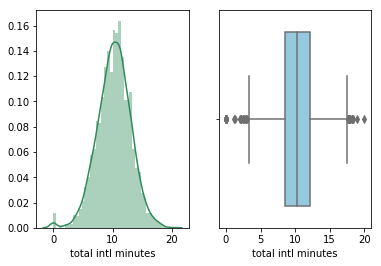

In [36]:
plt.subplot(121)
sns.distplot(df['total intl minutes'], color = 'seagreen')
plt.subplot(122)
sns.boxplot(df['total intl minutes'], color = 'skyblue')
plt.show()

In [37]:
plt.close()

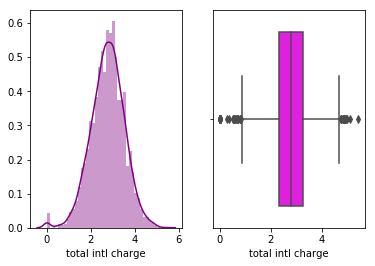

In [38]:
plt.subplot(121)
sns.distplot(df['total intl charge'], color = 'purple')
plt.subplot(122)
sns.boxplot(df['total intl charge'], color = 'magenta')
plt.show()

In [39]:
plt.close()